# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

размеры датасета =  (200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB
None
             Well         Por        Perm          AI     Brittle         TOC   
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000  \
mean   100.500000   14.991150    4.330750    2.968850   48.161950    0.990450   
std     57.879185    2.971176    1.731014    0.566885   14.129455    0.481588   
min      1.000000    6.550000    1.130000    1.280000   10.940000   -0.190000   
25%     50.750000   12.912

<Axes: xlabel='Prod', ylabel='Count'>

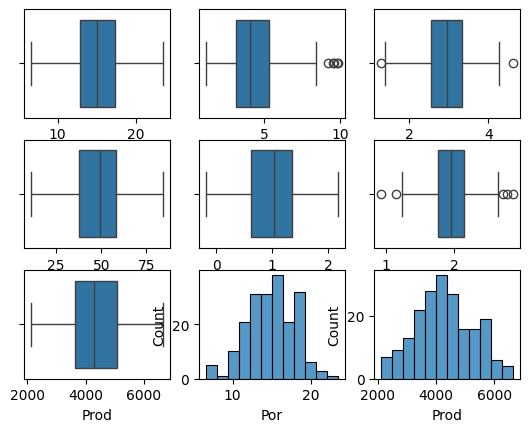

In [3]:
# Ваш код здесь




print('размеры датасета = ',data.shape)

print(data.info())
print(data.describe())
#мы имеем 6 признаков и 200 наблюдений
#данные не имеют хапредельных выбросов
# распределение не идельная гауссиана
# 
plt.subplot(3, 3, 1)
sns.boxplot(data=data,x = 'Por', orient='h')
plt.subplot(3, 3, 2)
sns.boxplot(data=data,x = 'Perm', orient='h')
plt.subplot(3, 3, 3)
sns.boxplot(data=data,x = 'AI', orient='h')
plt.subplot(3, 3, 4)
sns.boxplot(data=data,x = 'Brittle', orient='h')
plt.subplot(3, 3, 5)
sns.boxplot(data=data,x = 'TOC', orient='h')
plt.subplot(3, 3, 6)
sns.boxplot(data=data,x = 'VR', orient='h')
plt.subplot(3, 3, 7)
sns.boxplot(data=data, x = 'Prod',orient='h')
plt.subplot(3, 3, 8)
sns.histplot(data['Por'], bins= 12)
plt.subplot(3, 3, 9)
sns.histplot(data['Prod'], bins= 12)


### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

              Por      Perm        AI   Brittle       TOC        VR      Prod
Por      1.000000  0.760546 -0.461549 -0.218570  0.711831  0.111860  0.861910
Perm     0.760546  1.000000 -0.239636 -0.124017  0.471746  0.051023  0.727426
AI      -0.461549 -0.239636  1.000000  0.127599 -0.531864  0.499143 -0.390835
Brittle -0.218570 -0.124017  0.127599  1.000000 -0.214282  0.317929  0.237155
TOC      0.711831  0.471746 -0.531864 -0.214282  1.000000  0.299483  0.654445
VR       0.111860  0.051023  0.499143  0.317929  0.299483  1.000000  0.323182
Prod     0.861910  0.727426 -0.390835  0.237155  0.654445  0.323182  1.000000
Ранг матрицы =  7
Определитель матрицы =  0.0007477684988022486


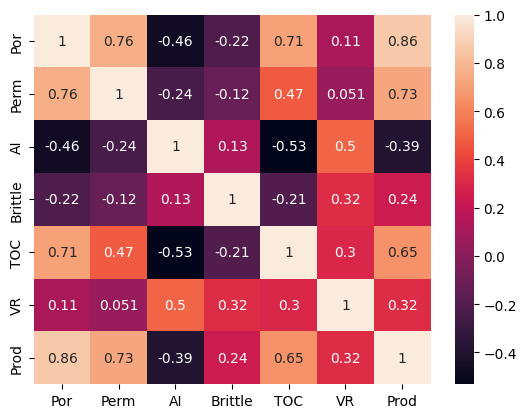

In [4]:
# Ваш код здесь

# посчитаем матрицу корреляции
# стандартизируем векторы в столбцах матрицы 
data_wo_id = data.drop(['Well'],axis= 1)
data_wo_id_cent = data_wo_id - data_wo_id.mean()
data_wo_id_st = data_wo_id_cent/np.linalg.norm(data_wo_id_cent, axis=0)
# матрица Грама стандартизированных признаков  является матрицей корреляции Пирсона
corr_matr = data_wo_id_st.T @ data_wo_id_st
print(corr_matr)
# построим тепловую карту
sns.heatmap(corr_matr,annot= True )
# вычислим ранг матрицы 
print("Ранг матрицы = ",np.linalg.matrix_rank(corr_matr))
# вычислим опредедитель матрицы 
print("Определитель матрицы = ",np.linalg.det(corr_matr))

> *Ваши выводы здесь*
сильнее всего коррелируют Por — пористость скважины (%) и Perm — проницаемость скважины;
также эти 2 параметра сильно коррелируют между собой, что логично по физическому смыслу

матрица корреляции в данном случае является плохо обусловленной определитель близок к 0. 
Имеется коллинеарность/сильная зависимость 
Por — пористость скважины (%) - сильно коррелирует с  Perm — проницаемость скважины и  TOC — общий органический углерод (%) 

Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 
Веса можно расчитать по МНК,не рекомендовано. 
т.к. модель будет неустойчивой и коэффициенты могут сильно отличаться в зависимоти от выборки из генеральной совокупности.



### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [5]:
# Ваш код здесь
# создадим матрицу наблюдений и вектор правильных ответов
X = data.drop(['Well','Prod'],axis= 1)
y = data['Prod']
#добавим смещение
X = np.column_stack((np.ones(X.shape[0]), X))
#нейдем коэффициенты
w = np.linalg.inv(X.T@X)@X.T@y
#выведем параметы с округлением
for i in range(len(w)):
    print('w'+str(i),'=',round(w[i]), end=',  ')





w0 = -1230,  w1 = 230,  w2 = 116,  w3 = -364,  w4 = 25,  w5 = -77,  w6 = 783,  

> *Ваши выводы здесь*

w4=25 и w5=-77  оказывают наименьшее воздействие на модель(т.к. минимум на порядок меньше остальных параметоров)

параметр w0 - смещение модели, и играет важную роль если остальные переменные предикторы равны нулю, в нашем случае физически это мало вероятно. 
             в нашем случае он отрицательный потому смешает вниз(уменьшает) предсказание - т.е. мы получим отрицательную добычу если оствльные предикторы равны нулю
Параметр w6 - вносит самый большой выклад к предлсказание, значение переменной предиктора VR — коэффициент отражения витринита (%) умножается на данный коэффициент, чем больше значение тем больще предсказание.
Параметр w3 - вносит значительный  вклад в предсказание знечение, переменная предиктор AI (акустический импеданс. чем она больше тем меньще предлсказанное значение. т.к. параметр w3 отрицательный




### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [6]:
# Ваш код здесь
# занесем предикторы для скважины 106
Por106 =  15.32
Perm106= 3.71
AI106= 3.29
Brittle106 = 55.99
TOC106 = 1.35
VR106 = 2.42
# расчитаем предсазанное значение
y106_pred = w[0] + w[1]*Por106 + w[2]*Perm106 + w[3]*AI106 + w[4]*Brittle106 + w[5]*TOC106 + w[6]*VR106
y106 = 4748.315024
print("предсказание модели для скважины 106 = ", round(y106_pred,6))
mae106 = abs(y106_pred-y106)
print("абсолютная ошибка для 106 скважины =", round(mae106,6))

# рассчитаем предсказания для известных скважин
y_pred = X@w

# найдем Среднеквадратическую ошибку (MSE)
print("MSE= ",np.square(np.subtract(y,y_pred)).mean())
# найдем среднюю абослютную  ошибку (MАE)
print("MAE= ",np.absolute(y-y_pred).mean())



предсказание модели для скважины 106 =  4722.721538
абсолютная ошибка для 106 скважины = 25.593486
MSE=  39323.40582929076
MAE=  153.60366973558067


> *Ваши выводы здесь*

Быили расчитаны 2 метрики MAE и MSE, в нашем случае наиболее красивый результат поазывает средняя абсолютная ошибка MAE. 
но MSE, в следстии и RMSE показывает что модель всего не адекватна. слишком большие средние потери, и это логичнго при наличии коллинеарности признаков . 

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

w0 = -1230.26,  w1 = 230.3,  w2 = 116.23,  w3 = -363.74,  w4 = 25.0,  w5 = -77.44,  w6 = 783.19,  

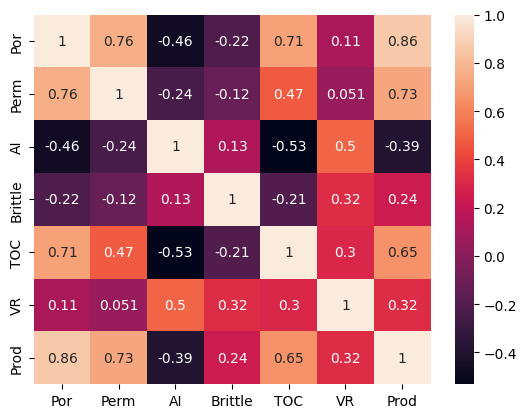

In [7]:
# Ваш код здесь

# построим тепловую карту
sns.heatmap(corr_matr,annot= True )
#выведем параметы с округлением
for i in range(len(w)):
    print('w'+str(i),'=',round(w[i],2), end=',  ')




> *Ваши выводы здесь*

Por — пористость скважины (%) - имеет самый высокий коэффициент корреляции - 0.86, но  параметр  w1- 230.3 не является достаточно высоким для отражения этой зависимости

Perm — проницаемость скважины = 0.73, аналогично w2 = 116.23 тоже вносит малый вклад в модель

TOC — общий органический углерод (%) - 0.65 положительный коэффициент корреляции, а модель имеет отрицательный  параметр w5 = - 77.44
VR — коэффициент отражения витринита (%); - 0.32 имеет слабую корреляцию, а коэффициент w6 = 783.19 оказывает значительное влияние на модель

На основании этих наблюдений можно говорить, что модель скорее всего дает не адекватные предстказания. которые сложно будет трактовать



### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [8]:
# Ваш код здесь
#примем гипотезу, что Perm — проницаемость скважины  коррелирует с Por — пористость скважины (%) и c TOC — общий органический углерод (%)
# потому попробуем убрать эти параметры
print("Гипотеза 1")
#примем гипотезу, что Perm — проницаемость скважины  коррелирует с Por — пористость скважины (%) и TOC — общий органический углерод (%)
X_new = data.drop(['Por','TOC','Prod','Well'],axis=1)

#добавим смещение
X_new = np.column_stack((np.ones(X_new.shape[0]), X_new))
#найдем коэффициенты
w_new = np.linalg.inv(X_new.T@X_new)@X_new.T@y

print(data.drop(['Por','TOC','Well'],axis=1).corr())
print()
#выведем параметры с округлением
for i in range(len(w_new)):
    print('w'+str(i),'=',round(w_new[i]), end=',  ')
    
print()    
# рассчитаем предсказания для известных скважин
y_pred_new = X_new@w_new

# найдем Среднеквадратическую ошибку (MSE)
print("MSE= ",np.square(np.subtract(y,y_pred_new)).mean())
# найдем среднюю абослютную  ошибку (MАE)
print("MAE= ",np.absolute(y-y_pred_new).mean())

print()
print("Гипотеза 2")
#примем вторую гипотезу, если Perm — проницаемость скважины  коррелирует с Por — пористость скважины (%) и TOC — общий органический углерод (%)
# то уберем это передиктор 
X_new1 = data.drop(['Perm','Prod','Well'],axis=1)

#добавим смещение
X_new1 = np.column_stack((np.ones(X_new1.shape[0]), X_new1))
#найдем коэффициенты
w_new1 = np.linalg.inv(X_new1.T@X_new1)@X_new1.T@y
print()
print(data.drop(['Perm','Well'],axis=1).corr())
print()
#выведем параметры с округлением
for i in range(len(w_new1)):
    print('w'+str(i),'=',round(w_new1[i]), end=',  ')
print()
# рассчитаем предсказания для известных скважин
y_pred_new1 = X_new1@w_new1

# найдем Среднеквадратическую ошибку (MSE)
print("MSE= ",np.square(np.subtract(y,y_pred_new1)).mean())
# найдем среднюю абослютную  ошибку (MАE)
print("MAE= ",np.absolute(y-y_pred_new1).mean())
print()
print("Исходнная модель")
# найдем Среднеквадратическую ошибку (MSE)
print("MSE= ",np.square(np.subtract(y,y_pred)).mean())
# найдем среднюю абослютную  ошибку (MАE)
print("MAE= ",np.absolute(y-y_pred).mean())


Гипотеза 1
             Perm        AI   Brittle        VR      Prod
Perm     1.000000 -0.239636 -0.124017  0.051023  0.727426
AI      -0.239636  1.000000  0.127599  0.499143 -0.390835
Brittle -0.124017  0.127599  1.000000  0.317929  0.237155
VR       0.051023  0.499143  0.317929  1.000000  0.323182
Prod     0.727426 -0.390835  0.237155  0.323182  1.000000

w0 = 1611,  w1 = 349,  w2 = -894,  w3 = 16,  w4 = 1567,  
MSE=  146938.04659410322
MAE=  300.99034918116934

Гипотеза 2

              Por        AI   Brittle       TOC        VR      Prod
Por      1.000000 -0.461549 -0.218570  0.711831  0.111860  0.861910
AI      -0.461549  1.000000  0.127599 -0.531864  0.499143 -0.390835
Brittle -0.218570  0.127599  1.000000 -0.214282  0.317929  0.237155
TOC      0.711831 -0.531864 -0.214282  1.000000  0.299483  0.654445
VR       0.111860  0.499143  0.317929  0.299483  1.000000  0.323182
Prod     0.861910 -0.390835  0.237155  0.654445  0.323182  1.000000

w0 = -1889,  w1 = 290,  w2 = -140,  w3 = 2

> *Ваши выводы здесь*

Обе гипотезы жизнеспособны и повысили объяснимость модели.
Плюс первой гипотезы более компактная модель, но метрики значительно хуже чем у второй гипотезы  
потому логичнее применить вторую гипотезу и удалить Perm — проницаемость скважины

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.

w1 - имеет положительный знак и  чем больше значение Por — пористость скважины, тем выше вклад в предсказание и тем вышне предсказанный уровень добычи  
w2 - имеет отрицательный знак и чем больше значения призанка AI — акустический импеданс тем меньше предсказанный уровень добычи
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 

значения метрик стало хуже, выросли и MAE и MSE. но так как повысилась трактуемость модели. сожно говорить о том что они стали больше отражать реальность.  
требуется проводить нормарование признаков и регуляризацию для  снижения ошибки

* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

противоречие знаков удалось победить. соотношение параметров w1 и w5, не соответствует соотношению коэффициентов корреляции. что устраняется номированием признаков.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [9]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

X = data.drop(['Perm','Prod','Well'],axis=1)
lin_reg = LinearRegression().fit(X, y)
for i in range(len(lin_reg.coef_)):
    print('w'+str(i+1),'=',round(lin_reg.coef_[i]), end=',  ')

print('w0=',round(lin_reg.intercept_))
y_pred = lin_reg.predict(X)

print("MАE=",mean_absolute_error(y, y_pred))
print("MSE=",mean_squared_error(y, y_pred))

w1 = 290,  w2 = -140,  w3 = 29,  w4 = 89,  w5 = 407,  w0= -1889
MАE= 170.36541690392477
MSE= 53393.67973621555


> *Ваши выводы здесь*

Результаты работы библиотеки  и результаты полученные вручную полностью совпадают. следовательно возможно использование обоих вариантов.
но библиотечные менее трудозатратны


## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [11]:
# Ваш код здесь

#удалим выбранные признаки
X = data.drop(['Perm','Prod','Well'],axis=1)
# стандаризуем признаки
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) 
#сгенерируем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(scaled_X)
display(pd.DataFrame(X_poly))


# сделаем линейную регресссию
poly_lin_reg = LinearRegression().fit(X_poly, y)

cv_results = cross_validate(poly_lin_reg, X_poly, y, cv=4,  scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','neg_mean_absolute_percentage_error'),
                            return_train_score=True)
print('MAE  на тренировочных фолдах:=',cv_results['train_neg_mean_absolute_error'].mean())
print('MAE на валидационных фолдах=',cv_results['test_neg_mean_absolute_error'].mean())
print('MSE  на тренировочных фолдах:=',cv_results['train_neg_mean_squared_error'].mean())
print('MSE на валидационных фолдах=',cv_results['test_neg_mean_squared_error'].mean())
print('MAPE  на тренировочных фолдах:=',cv_results['train_neg_mean_absolute_percentage_error'].mean()*100)
print('MAPE на валидационных фолдах=',cv_results['test_neg_mean_absolute_percentage_error'].mean()*100)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.982256,-0.298603,2.358297,0.352948,1.152048,0.964826,0.293305,-2.316451,-0.346685,-1.131606,...,13.115830,1.962944,6.407195,0.293778,0.958915,3.129970,0.043968,0.143513,0.468438,1.529017
1,-0.881032,0.444147,-0.141332,-0.209104,-0.280931,0.776218,-0.391308,0.124518,0.184228,0.247509,...,-0.002823,-0.004177,-0.005612,-0.006180,-0.008302,-0.011154,-0.009143,-0.012284,-0.016503,-0.022172
2,-0.327677,1.841224,1.748113,-0.209104,2.518377,0.107372,-0.603327,-0.572817,0.068519,-0.825215,...,5.342052,-0.639001,7.695903,0.076435,-0.920562,11.086922,-0.009143,0.110115,-1.326186,15.972114
3,0.903875,-0.599240,-0.592585,0.186414,-0.280931,0.816990,-0.541638,-0.535623,0.168495,-0.253926,...,-0.208091,0.065461,-0.098651,-0.020592,0.031033,-0.046768,0.006478,-0.009762,0.014712,-0.022172
4,0.853263,0.373409,-2.640962,1.081534,-0.214280,0.728058,0.318616,-2.253436,0.922833,-0.182838,...,-18.419868,7.543355,-1.494537,-3.089176,0.612047,-0.121263,1.265088,-0.250647,0.049660,-0.009839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.026119,0.002034,1.349364,-0.396455,0.318921,1.052921,-0.002087,-1.384608,0.406810,-0.327251,...,2.456898,-0.721858,0.580686,0.212088,-0.170611,0.137245,-0.062313,0.050127,-0.040324,0.032438
196,1.011847,0.727099,-0.272593,-0.021754,0.385571,1.023834,0.735713,-0.275822,-0.022011,0.390139,...,-0.020256,-0.001616,0.028651,-0.000129,0.002286,-0.040525,-0.000010,0.000182,-0.003234,0.057321
197,-0.968759,0.974682,0.632042,-2.145062,-0.780807,0.938495,-0.944233,-0.612296,2.078049,0.756414,...,0.252486,-0.856902,-0.311914,2.908207,1.058593,0.385330,-9.870050,-3.592719,-1.307757,-0.476026
198,0.188562,-0.864508,0.715765,1.872570,1.285349,0.035556,-0.163014,0.134966,0.353097,0.242369,...,0.366700,0.959354,0.658509,2.509843,1.722779,1.182530,6.566206,4.507102,3.093714,2.123553


MAE  на тренировочных фолдах:= -60.574617319398
MAE на валидационных фолдах= -122.13011293117015
MSE  на тренировочных фолдах:= -6548.667272533308
MSE на валидационных фолдах= -28496.418570182985
MAPE  на тренировочных фолдах:= -1.4147159998484118
MAPE на валидационных фолдах= -2.965258385326651


> *Ваши выводы здесь*


Полиномиальная линейная регрессия со стандартизацией показывает меньшую величину ошибок, чем простая линейная регрессия .  
величина MAE на тренировочных данных почти в 3 раза меньше и в полтора на тестовых  
так же заметно снижение MSE, исходя из этого можно сделатьт выводы:  
Полиномиальные признаки работают лучше для данной модели  

но показатели качества тестовые и тренировочные отличаются практически в два раза, что говорит о высоком разбросе модели.



### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [12]:
# Ваш код здесь

LassoRegression = Lasso(max_iter=1000000)
hyperParameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,9.2,1,5,10]}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
LassoRegressor.fit(X_poly,y)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(LassoRegressor, X_poly, y,  scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','neg_mean_absolute_percentage_error'), cv=5, return_train_score=True)
print('MAE  на тренировочных фолдах:=',cv_results['train_neg_mean_absolute_error'].mean())
print('MAE на валидационных фолдах=',cv_results['test_neg_mean_absolute_error'].mean())
print('MSE  на тренировочных фолдах:=',cv_results['train_neg_mean_squared_error'].mean())
print('MSE на валидационных фолдах=',cv_results['test_neg_mean_squared_error'].mean())
print('MAPE  на тренировочных фолдах:=',round(cv_results['train_neg_mean_absolute_percentage_error'].mean()*100,2))
print('MAPE на валидационных фолдах=',round(cv_results['test_neg_mean_absolute_percentage_error'].mean()*100,2))

MAE  на тренировочных фолдах:= -75.23378923416415
MAE на валидационных фолдах= -91.65564775980287
MSE  на тренировочных фолдах:= -10556.224033144052
MSE на валидационных фолдах= -15314.254494651494
MAPE  на тренировочных фолдах:= -1.77
MAPE на валидационных фолдах= -2.2


> *Ваши выводы здесь*

Видим, что с помощью - L1 -регуляризации удалось значительно уменьшить ошибки модели (MAPE,MSE,MAE) на валидационных фолдах.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [13]:
# Ваш код здесь

RidgeRegression = Ridge(max_iter=1000000)
hyperParameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,9.2,1,5,10,100,200,300,400,500,1000,2000]}
RidgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
RidgeRegressor.fit(X_poly,y)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(RidgeRegressor, X_poly, y,  scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','neg_mean_absolute_percentage_error'), cv=5, return_train_score=True)
print('MAE  на тренировочных фолдах:=',cv_results['train_neg_mean_absolute_error'].mean())
print('MAE на валидационных фолдах=',cv_results['test_neg_mean_absolute_error'].mean())
print('MSE  на тренировочных фолдах:=',cv_results['train_neg_mean_squared_error'].mean())
print('MSE на валидационных фолдах=',cv_results['test_neg_mean_squared_error'].mean())
print('MAPE  на тренировочных фолдах:=',round(cv_results['train_neg_mean_absolute_percentage_error'].mean()*100,2))
print('MAPE на валидационных фолдах=',round(cv_results['test_neg_mean_absolute_percentage_error'].mean()*100,2))

MAE  на тренировочных фолдах:= -64.24683115171759
MAE на валидационных фолдах= -105.24815834748503
MSE  на тренировочных фолдах:= -7448.508519072934
MSE на валидационных фолдах= -19254.53326206904
MAPE  на тренировочных фолдах:= -1.51
MAPE на валидационных фолдах= -2.57


> *Ваши выводы здесь*

видим, что  L2 - регуляризация позволила уменьшить разрыв между  ошибками модели на тренировочных и валидационных данных. но значительно меньше, чем на L1 - регуляризация


**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [14]:
# Ваш код здесь

ElasticNetRegression = ElasticNet(max_iter=1000000,)
hyperParameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,5,10],
                   'l1_ratio' :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
ElasticNetRegressor = GridSearchCV(ElasticNetRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
ElasticNetRegressor.fit(X_poly,y)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ElasticNetRegressor, X_poly, y,  scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','neg_mean_absolute_percentage_error'), cv=5, return_train_score=True)
print('MAE  на тренировочных фолдах:=',cv_results['train_neg_mean_absolute_error'].mean())
print('MAE на валидационных фолдах=',cv_results['test_neg_mean_absolute_error'].mean())
print('MSE  на тренировочных фолдах:=',cv_results['train_neg_mean_squared_error'].mean())
print('MSE на валидационных фолдах=',cv_results['test_neg_mean_squared_error'].mean())
print('MAPE  на тренировочных фолдах:=',round(cv_results['train_neg_mean_absolute_percentage_error'].mean()*100,2))
print('MAPE на валидационных фолдах=',round(cv_results['test_neg_mean_absolute_percentage_error'].mean()*100,2))


MAE  на тренировочных фолдах:= -75.92941669821677
MAE на валидационных фолдах= -92.42916082513042
MSE  на тренировочных фолдах:= -10754.306256037566
MSE на валидационных фолдах= -15572.965822421018
MAPE  на тренировочных фолдах:= -1.79
MAPE на валидационных фолдах= -2.22


> *Ваши выводы здесь*

Elastic-Net (эластичная сетка). Это комбинация - и -регуляризации. Получены результаты величины ошибок, которые чуть лучше L1 - регуляризации для данной выборки из генеральной совокупности.  
и мы имеем хорошую стабильность модели 

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [15]:
# Ваш код здесь
result_data = {'Наименование модели': ['ElasticNet'],
        'Гиперпараметры' : [ElasticNetRegressor.best_params_],
        'Полиномиальные признаки':[True],
        'MAPE тренировочные,% ': ['1.79'],
        'MAPE валидационные,% ': ['2.22']
        }

result = pd.DataFrame( result_data)

display(result)


,Наименование модели,Гиперпараметры,Полиномиальные признаки,"MAPE тренировочные,%","MAPE валидационные,%"
0,ElasticNet,"{'alpha': 5, 'l1_ratio': 1}",True,1.79,2.22


> *Ваши выводы здесь*


На основании проведенных исследований лучшей моделью оказалалсь ElasticNet с полиномиальным набором прнизнаков, при использовании для данного набора признаков.  
признаки "Perm — проницаемость скважины" и "Well — идентификатор скважины" - не используются для предсказания 